In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# import dataframes
path = r'/Users/samira/Desktop/6 Advanced Analytics and Dashboard Design/'
df_times = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'timesData.csv'))

In [3]:
df_times

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,"21,958",15.3,3%,48 : 52,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,"31,268",28.7,2%,36 : 64,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,"4,122",3.7,3%,NaN,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,"10,117",12.1,8%,28 : 72,2016


#### Hypothesis: The higher the ranking in teaching the higher the ranking overall.

In [4]:
# cleaning
df_times = df_times[df_times['world_rank'].str.contains("=", case=False) == False]
df_times = df_times[df_times['world_rank'].str.contains("-", case=False) == False]
df_times['world_rank'] = df_times['world_rank'].astype(int)

/Users/samira/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='teaching', ylabel='Density'>

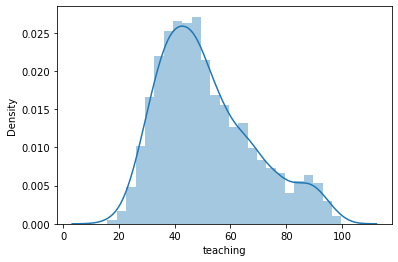

In [5]:
# check extreme values
sns.distplot(df_times['teaching'], bins=25)

In [6]:
# check mean
df_times['teaching'].mean()

51.36609712230217

In [7]:
# check median
df_times['teaching'].median()

47.9

In [8]:
# check max
df_times['teaching'].max()

99.7

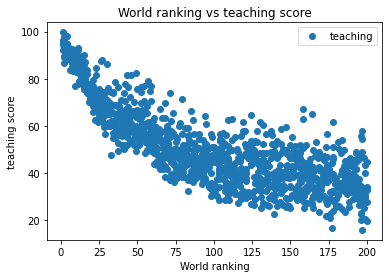

In [9]:
# scatterplot using matplotlib
df_times.plot(x = 'world_rank', y='teaching',style='o')
plt.title('World ranking vs teaching score')  
plt.xlabel('World ranking')  
plt.ylabel('teaching score')  
plt.show()

In [10]:
# variables into NumPy arrays, into separate objects

x = df_times['world_rank'].values.reshape(-1,1)
y = df_times['teaching'].values.reshape(-1,1)

In [11]:
x

array([[  1],
       [  2],
       [  3],
       ...,
       [198],
       [199],
       [200]])

In [12]:
y

array([[99.7],
       [97.7],
       [97.8],
       ...,
       [30.8],
       [30.5],
       [34.1]])

In [13]:
# split in training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [14]:
# create regression object
regression = LinearRegression()

In [15]:
# fit the regression object onto the training set
regression.fit(x_train, y_train)

LinearRegression()

In [16]:
# predict the values of y using x
y_predicted = regression.predict(x_test)

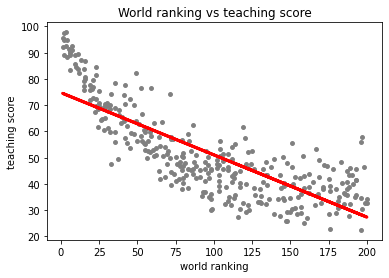

In [17]:
# create plot that shows regression line (test set)
plot_test = plt
plot_test.scatter(x_test, y_test, color='gray', s = 15)
plot_test.plot(x_test, y_predicted, color='red', linewidth =3)
plot_test.title('World ranking vs teaching score')
plot_test.xlabel('world ranking')
plot_test.ylabel('teaching score')
plot_test.show()

In [18]:
# objects with model summary statistics
rmse = mean_squared_error(y_test, y_predicted) # mean squared error
r2 = r2_score(y_test, y_predicted) # R2 score 

In [19]:
# print model summary statistics
print('Slope: ', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope:  [[-0.23701373]]
Mean squared error:  101.49894551352439
R2 score:  0.6559108891123044


In [20]:
y_predicted

array([[28.31766906],
       [47.98980882],
       [30.45079264],
       [37.79821834],
       [39.69432819],
       [37.56120461],
       [47.04175389],
       [48.46383628],
       [41.82745178],
       [73.58729188],
       [57.4703581 ],
       [51.30800107],
       [27.84364159],
       [32.58391623],
       [69.79507217],
       [50.35994614],
       [49.64890494],
       [56.04827571],
       [43.01252044],
       [57.23334437],
       [74.53534681],
       [57.94438556],
       [38.74627327],
       [56.28528944],
       [29.02871025],
       [36.37613595],
       [61.73660528],
       [43.96057537],
       [51.78202853],
       [71.21715456],
       [29.02871025],
       [33.29495743],
       [50.35994614],
       [64.81778379],
       [66.00285245],
       [68.13597604],
       [56.99633063],
       [69.3210447 ],
       [39.69432819],
       [72.16520949],
       [74.29833307],
       [45.38265776],
       [65.05479752],
       [64.81778379],
       [68.84701724],
       [61

In [21]:
# create df comparing actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,22.5,28.317669
1,34.7,47.989809
2,45.0,30.450793
3,42.2,37.798218
4,25.9,39.694328
5,36.3,37.561205
6,45.0,47.041754
7,31.9,48.463836
8,28.5,41.827452
9,91.5,73.587292


In [22]:
# predicting x_train
y_predicted_train = regression.predict(x_train)

In [23]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [24]:
print('Slope: ', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope:  [[-0.23701373]]
Mean squared error:  101.36811870315154
R2 score:  0.6551516631689651


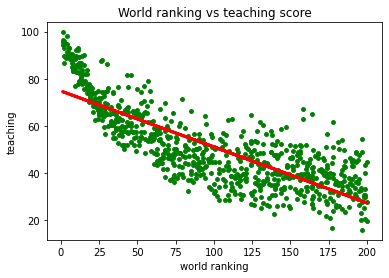

In [25]:
# visualizing training results (training set)
plot_test = plt
plot_test.scatter(x_train, y_train, color='green', s = 15)
plot_test.plot(x_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('World ranking vs teaching score')
plot_test.xlabel('world ranking')
plot_test.ylabel('teaching')
plot_test.show()

**Predicted vs Actual Values**<br>
As we can see in the visualization above: The red line is linear. Whereas the green points rather indicate a curve-like line.

**Model Performance**<br>
Roughly and in the long term, I think the model does a good job. In terms of data "range", the range decreases against the higher ranked universities (which makes sense in terms of context, since it can be assumed that top universities are especially highly ranked in teaching score).